In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**Load and confirm the shape of the data**

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [4]:
print(f"X_train-shape: {X_train.shape}")
print(f"y_train-shape: {y_train.shape}")
print(f"X_test-shape:  {X_test.shape}")
print(f"y_test-shape:  {y_test.shape}")

X_train-shape: (50000, 32, 32, 3)
y_train-shape: (50000, 1)
X_test-shape:  (10000, 32, 32, 3)
y_test-shape:  (10000, 1)


**Visualize first 10 images, including class names**

C:\Users\gavin\AppData\Local\Temp\ipykernel_12084\2968483261.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[i])


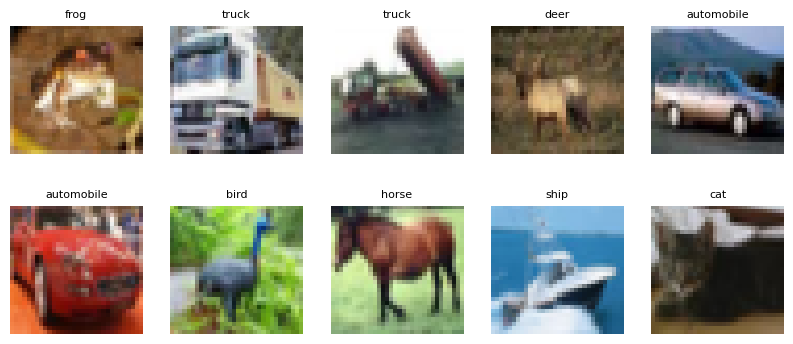

In [6]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

fix, axes = plt.subplots(2,5, figsize = (10,4))

axes = axes.ravel()


for i in np.arange(0,10):
     axes[i].imshow(X_train[i,1:])
     label_index = int(y_train[i])
     axes[i].set_title(class_names[label_index], fontsize = 8)
     axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)



**Normalize by Scaling and perform one-hot encoding**

In [8]:
from tensorflow.keras.utils import to_categorical

X_train = X_train / 255.0
X_test = X_test / 255.0

y_name_train = to_categorical(y_train, 10)
y_name_test = to_categorical(y_test, 10)

**Building the model**

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization

model = Sequential([
    Input(shape=(32, 32, 3)),
    
    Conv2D(filters=32, kernel_size=(3,3), activation = "relu", padding="same" ),
    Conv2D(filters=32, kernel_size=(3,3), activation = "relu", padding="same" ),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(filters=64, kernel_size=(3,3), activation = "relu", padding="same" ),
    Conv2D(filters=64, kernel_size=(3,3), activation = "relu", padding="same" ),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [11]:
from tensorflow.keras.metrics import Precision, Recall

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

stop = EarlyStopping(
        monitor='val_loss', 
        patience=3, # Number of epochs to wait without improvement
        restore_best_weights=True #Restore Model weights from best epoch
)

In [13]:
fm = model.fit(X_train, 
               y_name_train, 
               validation_data=(X_test, y_name_test),
               epochs = 20,
               callbacks=[stop]
              )

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.3559 - loss: 1.7451 - precision: 0.5976 - recall: 0.1397 - val_accuracy: 0.6103 - val_loss: 1.0684 - val_precision: 0.7661 - val_recall: 0.4428
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.6004 - loss: 1.1268 - precision: 0.7462 - recall: 0.4439 - val_accuracy: 0.6879 - val_loss: 0.8850 - val_precision: 0.8081 - val_recall: 0.5665
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.6737 - loss: 0.9285 - precision: 0.7941 - recall: 0.5536 - val_accuracy: 0.7129 - val_loss: 0.8175 - val_precision: 0.8219 - val_recall: 0.5971
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7087 - loss: 0.8211 - precision: 0.8107 - recall: 0.6088 - val_accuracy: 0.7273 - val_loss: 0.7888 - val_precision: 0.8436 - val_recall: 0.6115
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7313 - loss: 0.7654 - precision: 0.8246 - recall: 0.6410 - val_accuracy: 0

**Evaluate the Model**

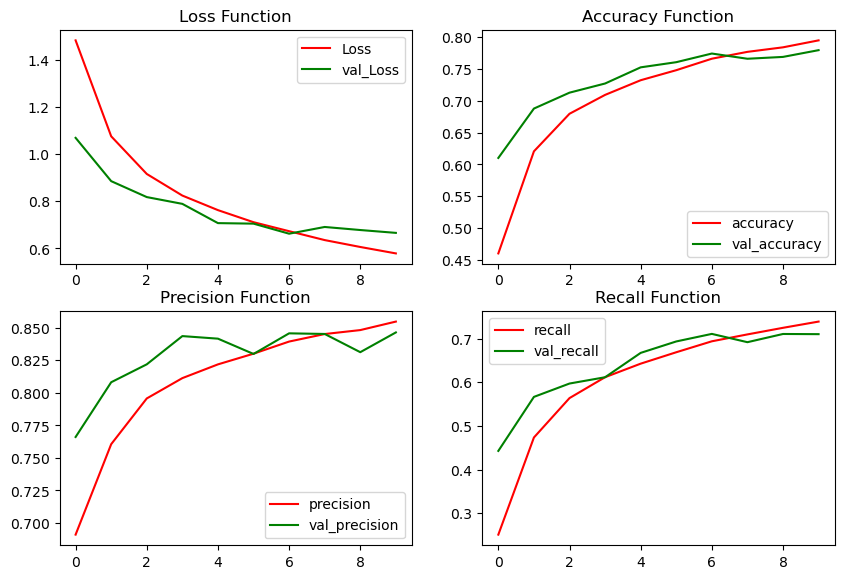

In [31]:
plt.figure(figsize=(10, 14))

plt.subplot(4, 2, 1)
plt.plot(fm.history['loss'], label='Loss',color='red')
plt.plot(fm.history['val_loss'], label='val_Loss',color='green')
plt.title('Loss Function')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(fm.history['accuracy'], label='accuracy',color='red')
plt.plot(fm.history['val_accuracy'], label='val_accuracy',color='green')
plt.title('Accuracy Function')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(fm.history['precision'], label='precision',color='red')
plt.plot(fm.history['val_precision'], label='val_precision',color='green')
plt.title('Precision Function')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(fm.history['recall'], label='recall',color='red')
plt.plot(fm.history['val_recall'], label='val_recall',color='green')
plt.title('Recall Function')
plt.legend()

In [16]:
evaluate = model.evaluate(X_test, y_name_test)
print(f'Test Accuracy : {evaluate[1] * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7737 - loss: 0.6571 - precision: 0.8454 - recall: 0.7077
Test Accuracy : 77.44%


In [17]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1000
           1       0.87      0.90      0.88      1000
           2       0.72      0.64      0.67      1000
           3       0.58      0.57      0.58      1000
           4       0.72      0.77      0.74      1000
           5       0.71      0.64      0.67      1000
           6       0.74      0.88      0.81      1000
           7       0.84      0.83      0.84      1000
           8       0.86      0.87      0.86      1000
           9       0.88      0.85      0.87      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [18]:
def plot_sample(X, y, y_pred, index):
    plt.figure(figsize = (10,2))
    plt.imshow(X[index])
    plt.xlabel(f"actual:  {class_names[y[index]]}\n predicted:  {class_names[y_pred[index]]}")

In [19]:
predictions = model.predict(X_test)
y_pred_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [25]:
# reshape y_train to one dimensional array
y_testa = y_test.reshape(-1,)

print("Actual:    ", y_testa[:20]) #actual
print("Predicted: ", y_pred_classes[:20]) #predicted

Actual:     [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]
Predicted:  [3 8 8 0 6 6 1 4 3 1 0 9 5 7 9 6 5 7 8 6]


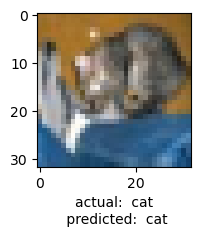

In [41]:
plot_sample(X_test, y_testa, y_pred_classes, 0)